In [77]:
import os
import numpy as np
import pandas as pd
import networkx as nx
from scipy import stats as st
import matplotlib.pyplot as plt

In [78]:
stats_dir = os.path.join("data","stats")

In [79]:
stats = os.listdir(stats_dir)

In [94]:
x_axis = []
y_axis = []

edge_axis = []
z_score_axis = []
t_score_axis = []

for file in stats:
    if not file.endswith(".csv"):
        continue
    
    edges = int(file.split("_")[1])
    
    fp = os.path.join(stats_dir,file)
    
    frequencies = np.genfromtxt(fp, delimiter=",")
    
    for freq in frequencies:
        x_axis += [edges]
        y_axis += [freq]
        
    z = (frequencies.mean() - 40) / (frequencies.std() / len(frequencies) ** 0.5)
    prob = st.norm.cdf(z)
    t_score, _ = st.ttest_1samp(frequencies, 40)
    t_score_axis += [t_score]
    z_score_axis += [prob]
    edge_axis += [edges]
    

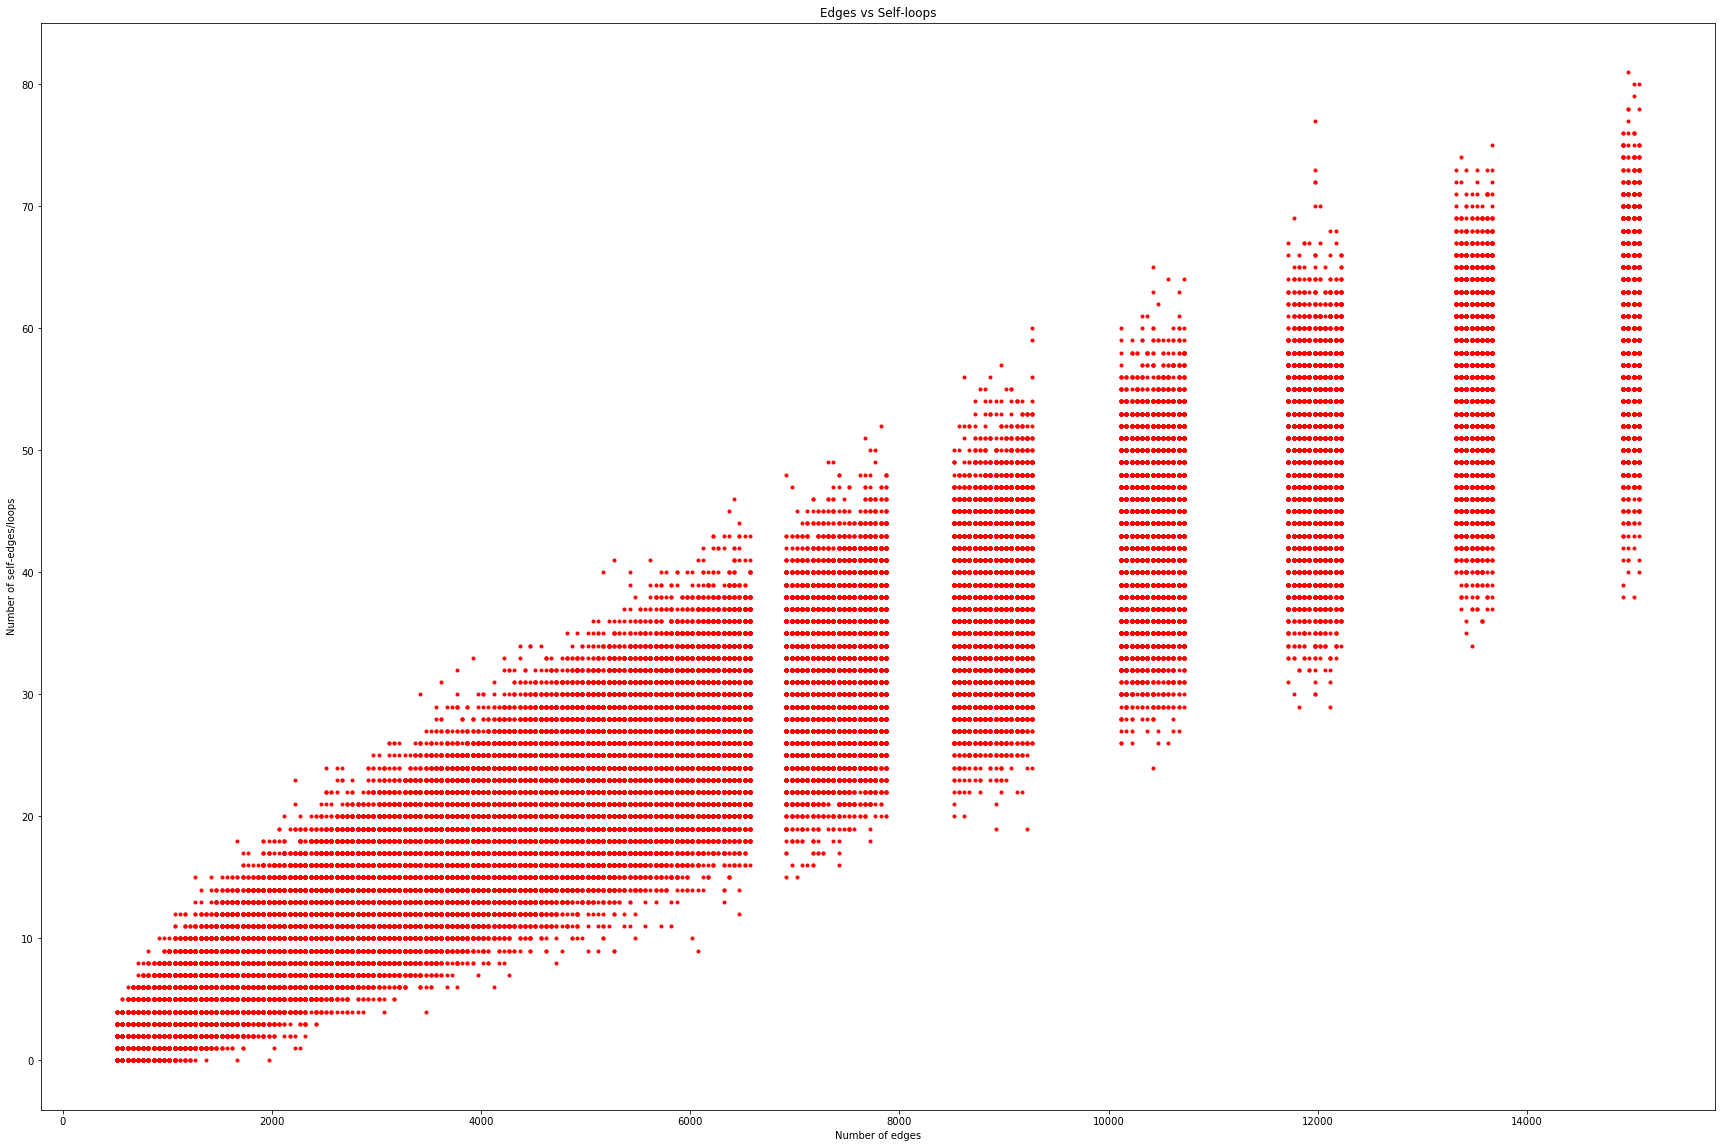

In [115]:
plt.figure(figsize=(30,20))
plt.scatter(x_axis, y_axis, c="red", marker=".")
plt.xlabel("Number of edges")
plt.ylabel("Number of self-edges/loops")
plt.title("Edges vs Self-loops")
plt.savefig("edges_vs_selfloops.png")
plt.show()


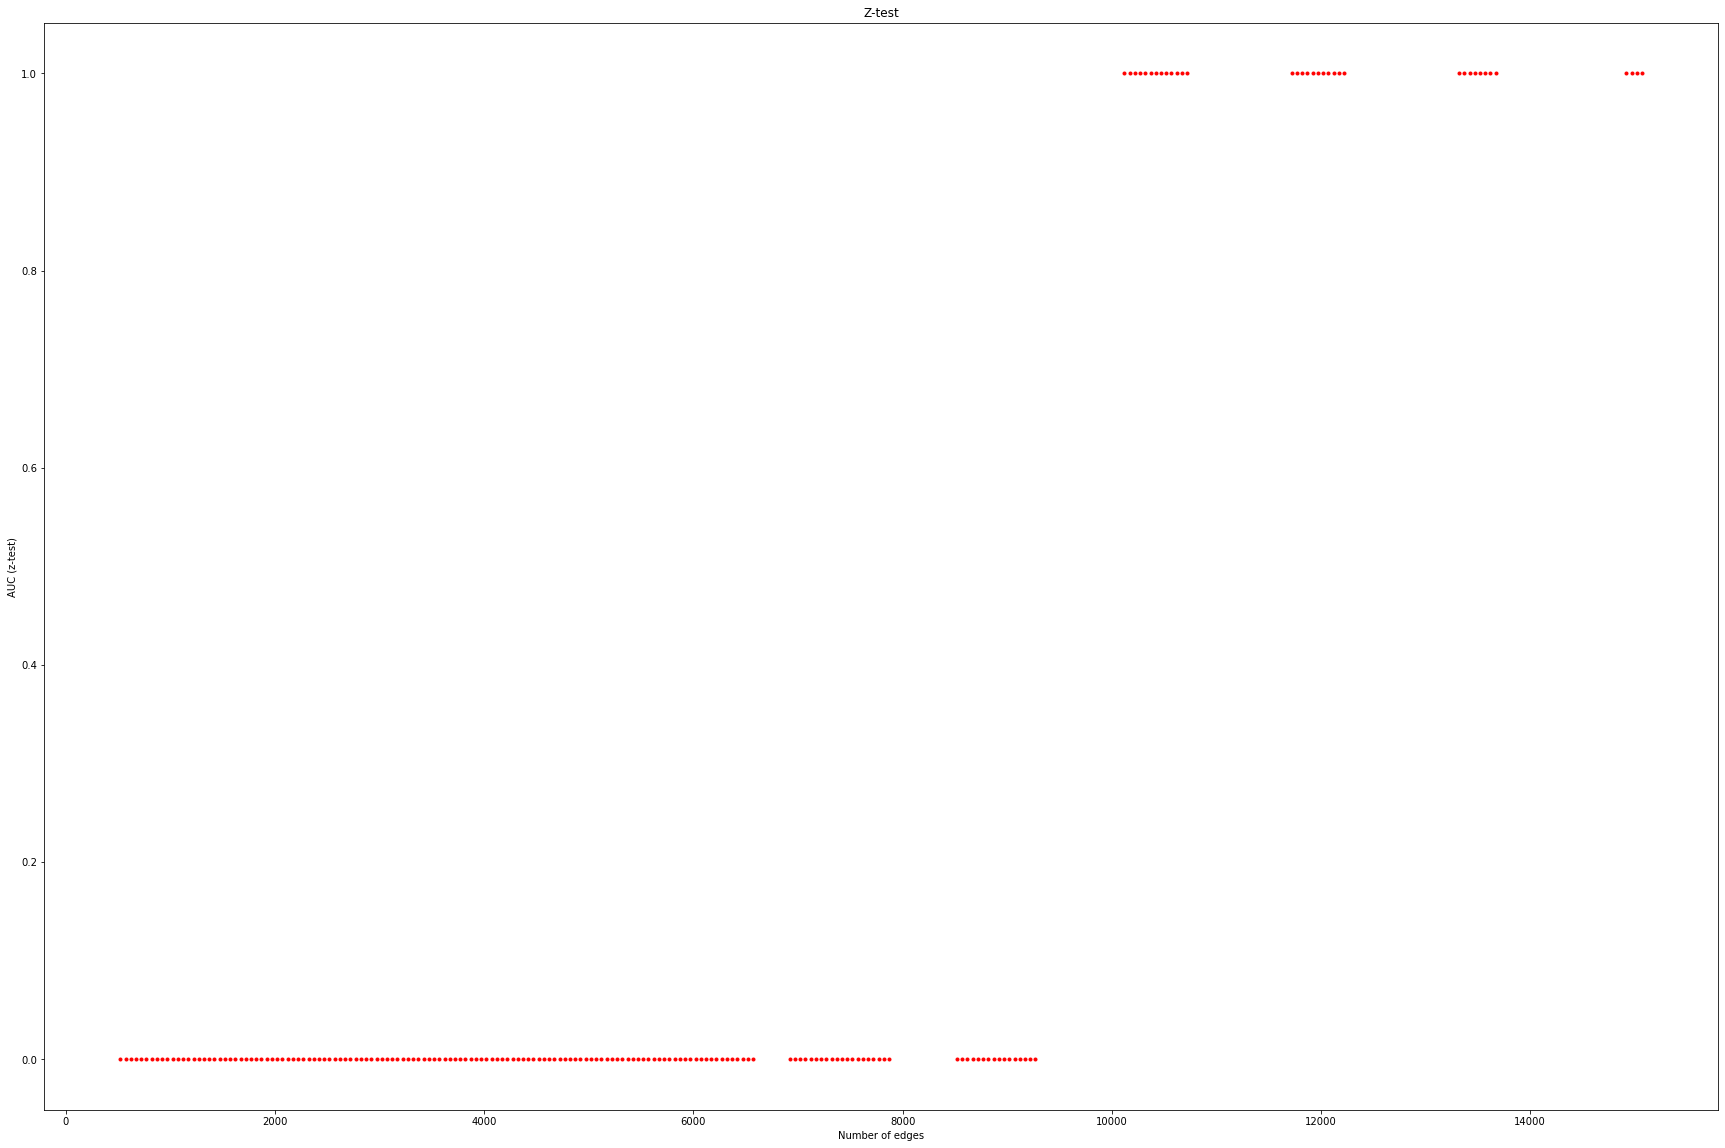

In [116]:
plt.figure(figsize=(30,20))
plt.scatter(edge_axis, z_score_axis, c="red", marker=".")
plt.xlabel("Number of edges")
plt.ylabel("AUC (z-test)")
plt.title("Z-test")
plt.savefig("edges_vs_auc.png")
plt.show()

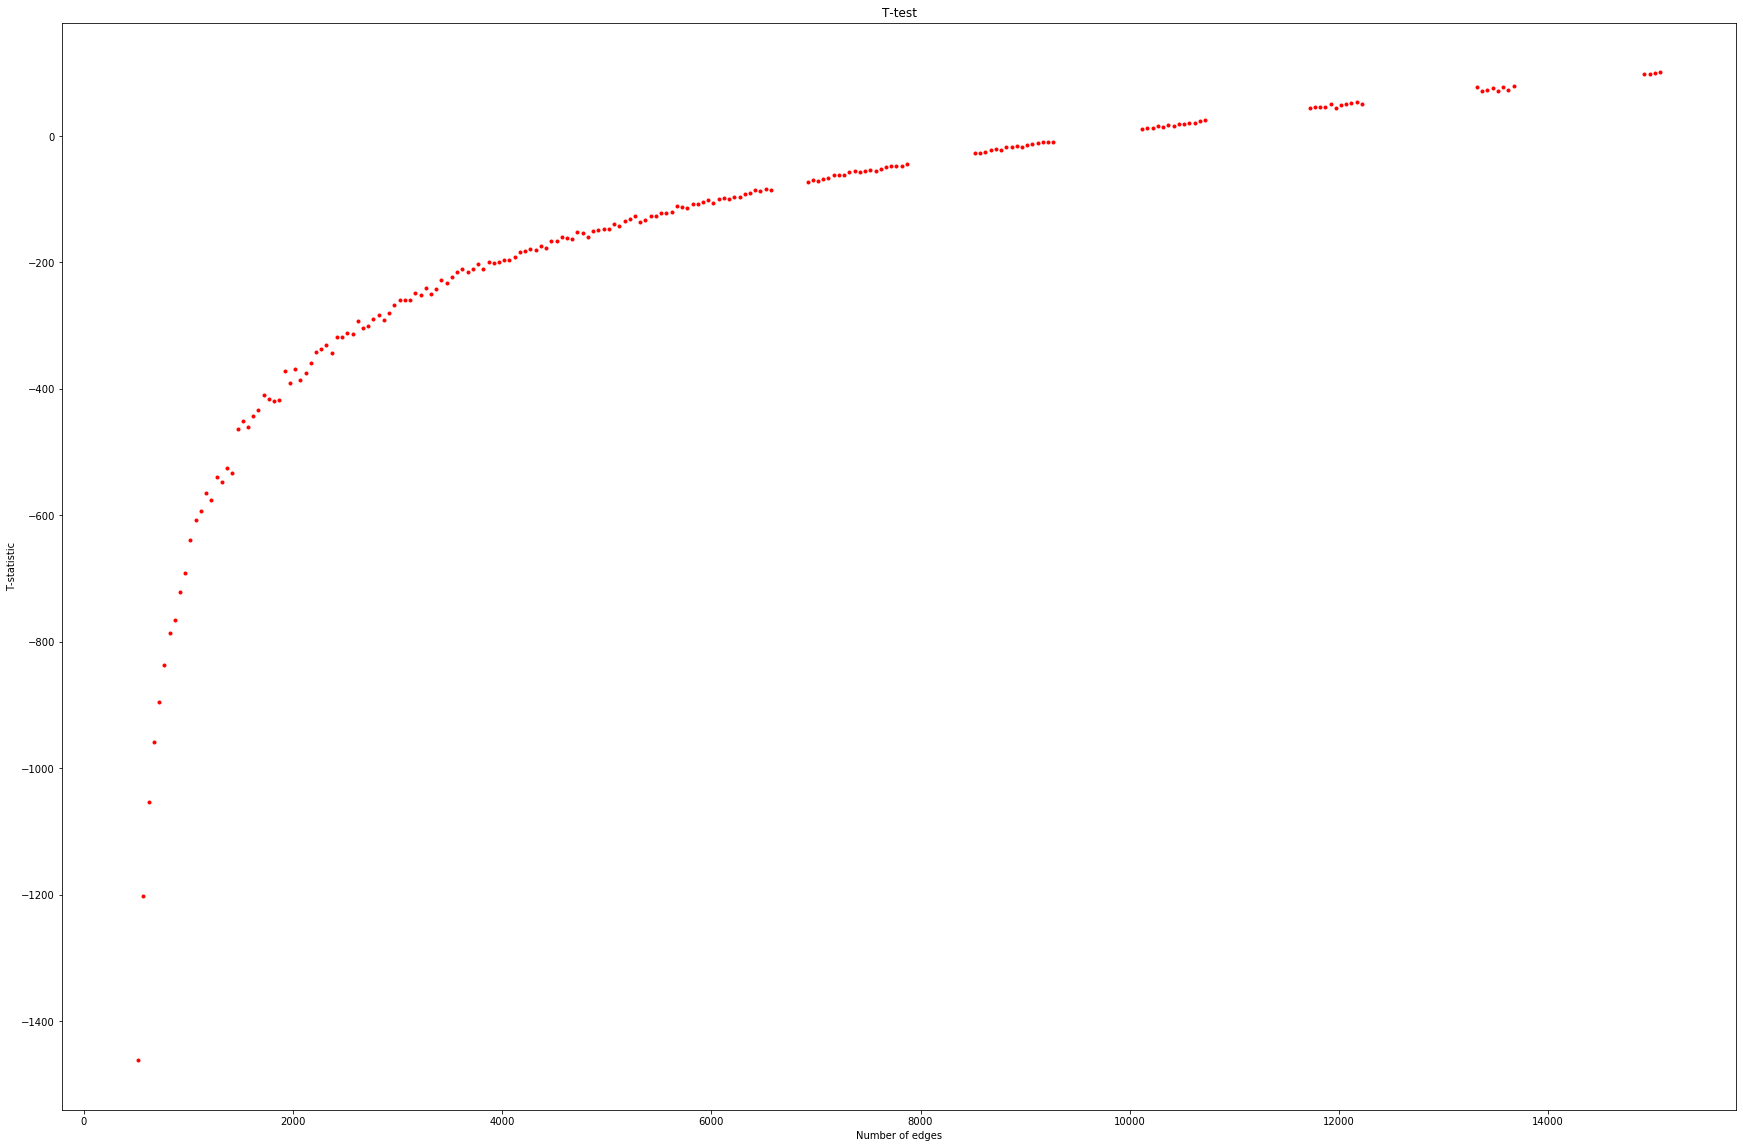

In [118]:
plt.figure(figsize=(30,20))
plt.scatter(edge_axis, t_score_axis, c="red", marker=".")
plt.xlabel("Number of edges")
plt.ylabel("T-statistic")
plt.title("T-test")
plt.savefig("edges_vs_t_stat.png")
plt.show()

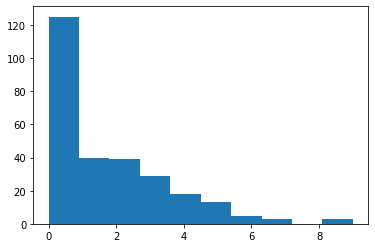

In [96]:
plt.figure(figsize=(30,20))
graph = nx.read_edgelist("data/420_13370/420_13370_0.edgelist")
plt.hist(nx.degree_histogram(graph))
plt.savefig("420_133.png")
plt.show()